In [1]:
# -*- coding: utf-8 -*-
# -*- author : Lokman Mheni - Fabio Palmisano -*-
# -*- date : 2024-04-20 -*-
# -*- Last revision: 2024-05-14 *-
# -*- python version : 3.11.9 -*-
# -*- Description: Notebook containing the project of NML 2024-*-

# <center> EE - 452: Network Machine Learning </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Bookreads recommenders </center>
---

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

#!pip install grakel
from grakel import GraphKernel
from grakel.utils import graph_from_networkx
from tqdm import tqdm

ratings = pd.read_csv( 'data/ratings.csv' )
tr = pd.read_csv( 'data/to_read.csv' )
b = pd.read_csv( 'data/books.csv' )

t = pd.read_csv( 'data/tags.csv' )
bt = pd.read_csv( 'data/book_tags.csv')

# Data Preprocessing

In [3]:
# Ratings data
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


<Axes: >

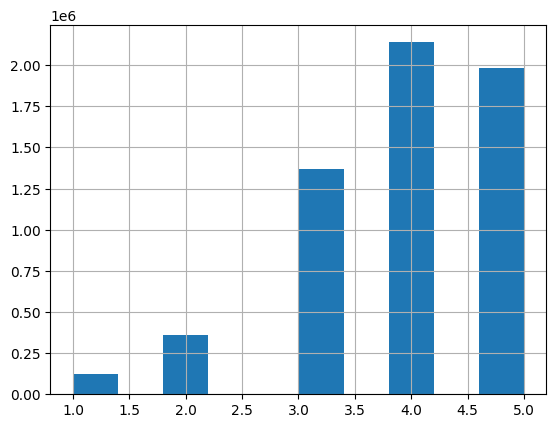

In [4]:
ratings['rating'].hist()

In [5]:
len(ratings)

5976479

In [6]:
# Pint the top 10 books of ratings
ratings['book_id'].value_counts().head(10)


book_id
1     22806
2     21850
4     19088
3     16931
5     16604
17    16549
20    15953
18    15855
23    15657
7     15558
Name: count, dtype: int64

In [20]:
#Print the top 10 user_id with more ratings 
ratings['user_id'].value_counts()

user_id
12874    200
30944    200
52036    199
12381    199
28158    199
        ... 
32128     21
40753     21
51725     21
43675     20
34590     19
Name: count, Length: 53424, dtype: int64

In [19]:
# take last 10 elements of ratings['user_id'].value_counts().head(10)
ratings['user_id'].value_counts().tail(10)


user_id
32960    22
22020    22
25258    22
42736    22
43672    22
32128    21
40753    21
51725    21
43675    20
34590    19
Name: count, dtype: int64

In [8]:
# Create an empty graph
#G = nx.Graph()

# Iterate over the 'tr' DataFrame and add edges between users who added the same book to 'to read'
#for _, row in tqdm(tr.iterrows(), total=len(tr)):
#    book_id = row['book_id']
#    user_id = row['user_id']
    
    # Get all users who added the same book to 'to read'
#    same_book_users = tr[tr['book_id'] == book_id]['user_id'].tolist()
    
    # Add edges between the current user and all other users who added the same book
#    for other_user in same_book_users:
#        if user_id != other_user:
#            G.add_edge(user_id, other_user)

# Plot the graph
#nx.draw(G, with_labels=True)

# Graph Creation

##  User to User graph

In [9]:
# Quickest 
import pandas as pd
import networkx as nx
from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

# Sample because it's taking too long

r = ratings.sample(frac=0.1)
# Create a dictionary where the keys are book_ids and the values are sets of user_ids
book_users = defaultdict(set)

# Populate the dictionary
for _, row in tqdm(r.iterrows(), total=r.shape[0]):
    book_users[row['book_id']].add(row['user_id'])

# Create an empty graph
graph = nx.Graph()

# Iterate over each book
for book_id, users in tqdm(book_users.items(), total=len(book_users)):
    # Generate all pairs of users for this book
    user_pairs = combinations(users, 2)
    
    # Add edges between all pairs of users
    for user_pair in user_pairs:
        graph.add_edge(*user_pair)

# Print the number of nodes and edges in the graph
print(len(graph.nodes()))
print(len(graph.edges()))

100%|██████████| 9999/9999 [04:23<00:00, 37.92it/s]  


53394
91790333


In [10]:
graph.nodes()

NodeView((28675, 26117, 35334, 35342, 29204, 34327, 9751, 28697, 37402, 2597, 8230, 42027, 45, 10307, 7748, 27719, 8778, 6730, 27729, 40534, 11350, 16474, 27738, 38492, 8284, 42079, 47716, 8293, 33898, 2671, 28275, 13428, 15483, 29316, 42632, 11402, 20109, 14991, 29845, 32917, 44694, 40092, 43167, 2719, 43681, 31908, 3748, 40103, 9896, 20651, 683, 17069, 178, 40116, 3766, 3256, 43203, 200, 47818, 8907, 30411, 14539, 36562, 11480, 20188, 223, 42215, 36583, 38119, 42220, 9453, 49390, 242, 30963, 47351, 19196, 19203, 7431, 17674, 9482, 1291, 6925, 42771, 13588, 21781, 4891, 42780, 17180, 36640, 30503, 40243, 35637, 18743, 1853, 6480, 3409, 339, 2900, 43866, 8543, 4963, 12645, 25959, 24939, 2415, 49008, 15216, 31094, 52602, 14717, 18820, 33156, 38794, 20363, 17298, 3996, 26526, 42920, 29097, 16810, 50606, 3502, 2481, 34230, 37302, 31160, 37817, 51130, 5562, 19900, 49091, 40900, 34755, 38346, 16333, 24525, 3021, 19922, 52179, 22484, 981, 45528, 3545, 7129, 37851, 22493, 39390, 39389, 12774,

In [11]:
ratings.query('user_id == 12874')

,user_id,book_id,rating
786481,12874,306,4
786482,12874,118,4
786483,12874,43,4
786484,12874,943,3
786485,12874,1186,4
...,...,...,...
786728,12874,846,4
786730,12874,4974,4
786731,12874,4244,3
786733,12874,189,4


Mean degree for the first 10 nodes: 9.0
Mean degree for the first 20 nodes: 19.0
Mean degree for the first 30 nodes: 29.0


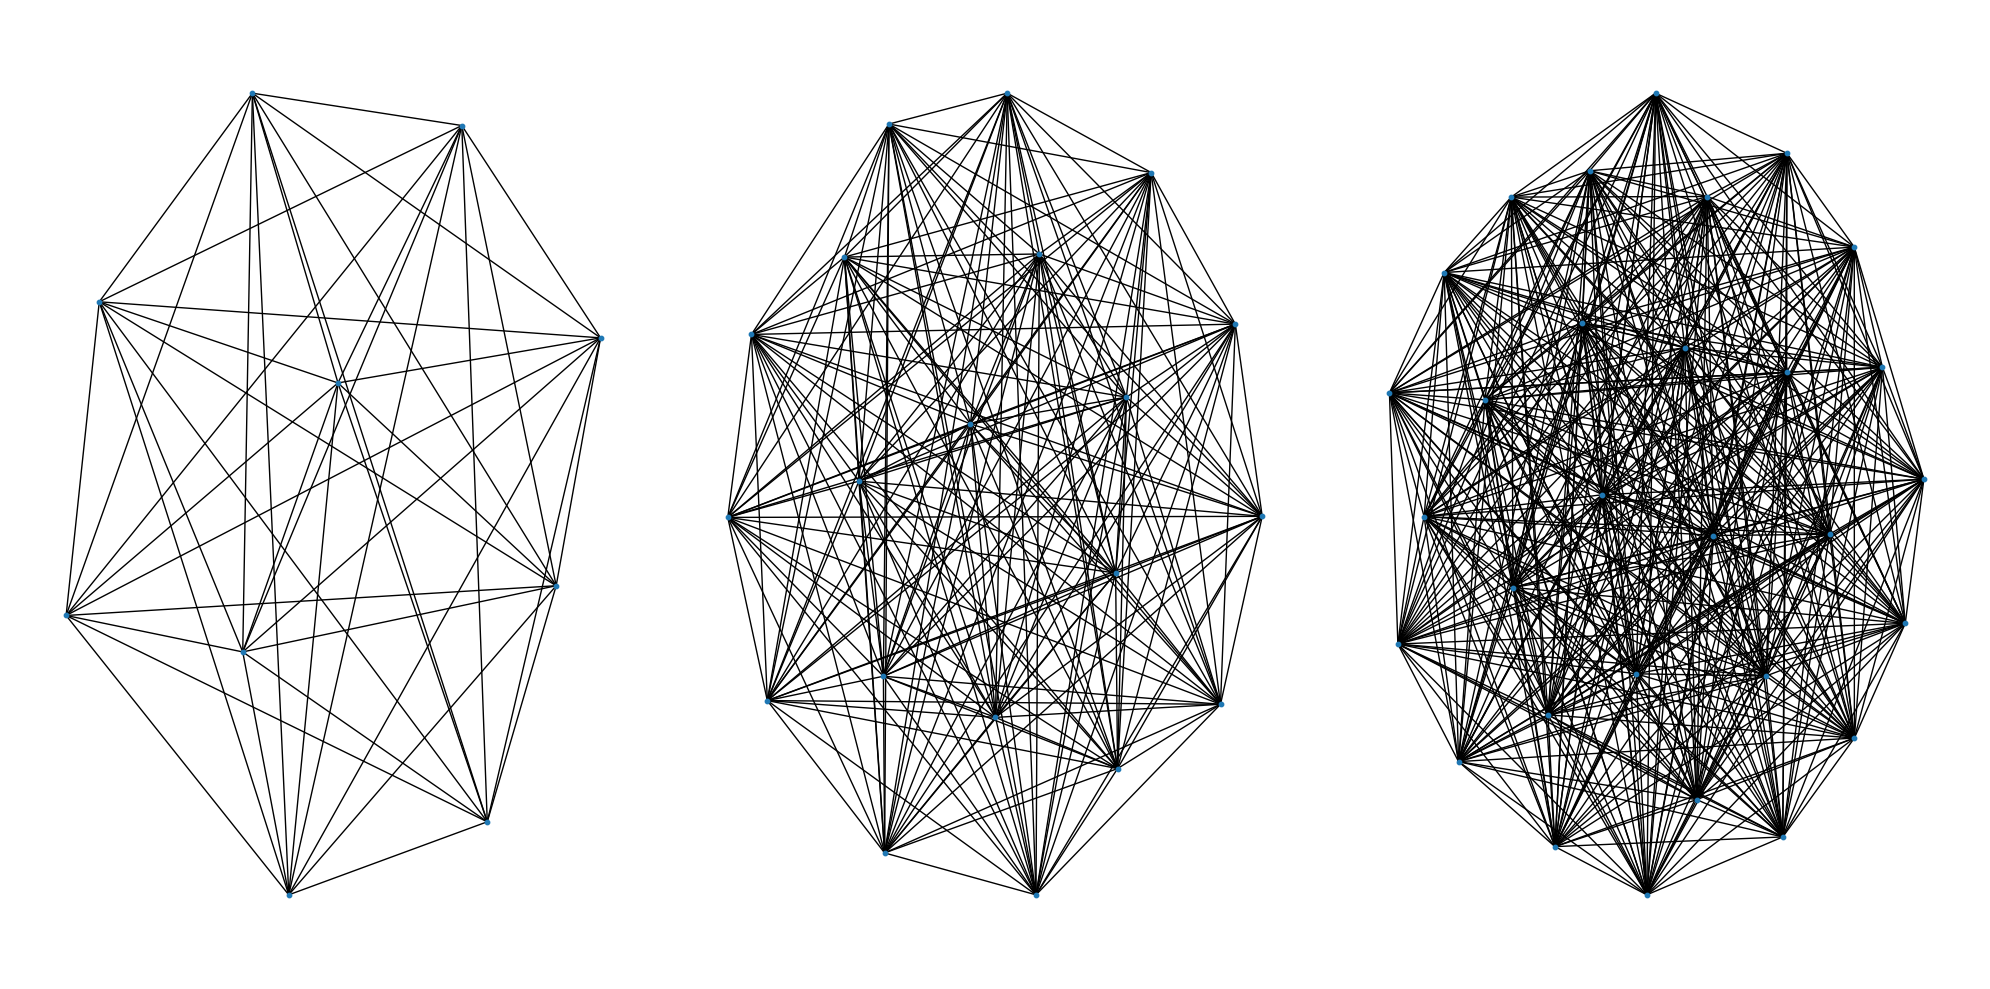

In [12]:
import matplotlib.pyplot as plt

# Set up the figure and the grid of subplots
plt.figure(figsize=(20, 10))


sampled_nodes = list(graph.nodes())[:10]

# Iterate over the first 9 subplots
for i in range(3):
    # Get the first 10 * (i + 1) nodes
    sampled_nodes = list(graph.nodes())[:10 * (i + 1)]
    
    # Create a subgraph with the sampled nodes
    sampled_graph = graph.subgraph(sampled_nodes)

    degree = dict(sampled_graph.degree())
    mean_degree = np.mean(list(degree.values()))
    print(f"Mean degree for the first {len(sampled_nodes)} nodes: {mean_degree}")
    
    # Draw the subgraph and print the mean degree of the nodes present in this sampled graph

    
    plt.subplot(1, 3, i + 1)
    

    nx.draw(sampled_graph, with_labels=False, node_size=10)

plt.tight_layout()
plt.show()


In [ ]:
# Plot random subgraph (random nodes) not the first then as above
plt.figure(figsize=(20, 10))

# Iterate over the first 9 subplots
for i in range(3):
    # Take 10 randoms nodes
    sampled_nodes = list(graph.nodes())
    np.random.shuffle(sampled_nodes)
    sampled_nodes = sampled_nodes[:10]

    
    # Create a subgraph with the sampled nodes
    sampled_graph = graph.subgraph(sampled_nodes)

    degree = dict(sampled_graph.degree())
    mean_degree = np.mean(list(degree.values()))
    print(f"Mean degree for the first {len(sampled_nodes)} nodes: {mean_degree}")
    
    # Draw the subgraph and print the mean degree of the nodes present in this sampled graph
    plt.subplot(1, 3, i + 1)
    nx.draw(sampled_graph, with_labels=False, node_size=10)

In [13]:
# Calculate the mean degree of the nodes in the graph
degree = dict(graph.degree())
mean_degree = np.mean(list(degree.values()))
print(f"Mean degree: {mean_degree}")


Mean degree: 3438.2265048507325


In [14]:
# degree of nodes 28672 (most rating's user_id)
degree[28672]


1945

In [15]:
# Take the last element of ratings['book_id'].value_counts()
ratings['book_id'].value_counts().index[-1]

7803

In [25]:
# The user (34590) with less ratings
ratings.query('user_id == 34590')

,user_id,book_id,rating
3456860,34590,2033,4
3456861,34590,2292,4
3474484,34590,6198,3
3474485,34590,127,4
3476800,34590,6625,5
3476812,34590,6723,5
3476814,34590,8855,4
3476819,34590,4171,4
3507023,34590,8634,4
3536987,34590,619,5


In [31]:
# degree of nodes 28672 (most rating's user_id)
print("Degree for the most rating's user_id: " ,degree[28672])

# Check the node degree of node 34590 (less rating's user_id)
print("Degree for the last rating's user_id : ",degree[34590])


Degree for the most rating's user_id:  1945
Degree for the last rating's user_id :  23


In [ ]:
degree = dict(graph.degree())